<a href="https://colab.research.google.com/github/hongeunhee/RAG/blob/main/Automating_Data_Analysis_with_Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following is an example of using langchain agent to graph the top 10 genres using the "Most watched Netflix original" data of Kaggle without code and finding movies that have received least and most views.

In [33]:
# Installing langchain and openai libraries
#!pip install langchain openai
# Importing libraries
!pip install langchain_experimental
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI

#setup the api key
os.environ['OPENAI_API_KEY']="YOUR OPEN API KEY"

In [34]:
# Importing the data
df = pd.read_csv('/content/imdb.csv') #Please writhe the path of your data
# Initializing the agent
agent = create_pandas_dataframe_agent(OpenAI(temperature=0),
              df, verbose=True)
openai = OpenAI(temperature=0.0)
openai.model_name # This will print the model being used,
                  # by default it uses ‘gpt-3.5’

'gpt-3.5-turbo-instruct'

In [35]:
# Let's check the shape of data.'
agent("What is the shape of the dataset?")



> Entering new AgentExecutor chain...
Thought: I need to use the shape attribute of the dataframe to get the number of rows and columns.
Action: python_repl_ast
Action Input: df.shape(80, 7)80 rows and 7 columns means there are 80 TV shows in the dataset.
Final Answer: There are 80 TV shows in the dataset.

> Finished chain.


{'input': 'What is the shape of the dataset?',
 'output': 'There are 80 TV shows in the dataset.'}

In [36]:
#identifying missing values
agent("How many missing values are there in each column?")



> Entering new AgentExecutor chain...
Thought: I need to use the isnull() function to check for missing values, and then use the sum() function to count them.
Action: python_repl_ast
Action Input: df.isnull().sum()lister-item-index     0
lister-item-header    0
certificate           0
runtime               0
genre                 0
rating                0
votes                 0
dtype: int64I now know the final answer
Final Answer: There are no missing values in any column.

> Finished chain.


{'input': 'How many missing values are there in each column?',
 'output': 'There are no missing values in any column.'}

In [37]:
# Let us see how the data looks like
agent("Display 5 records in form of a table.")



> Entering new AgentExecutor chain...
Thought: I need to use the print function to display the dataframe in a table format.
Action: python_repl_ast
Action Input: print(df.head())   lister-item-index       lister-item-header certificate runtime  \
0                1.0          Stranger Things          15  60 min   
1                2.0           13 Reasons Why          18  60 min   
2                3.0  Orange Is the New Black          18  59 min   
3                4.0             Black Mirror          18  60 min   
4                5.0              Money Heist          15  60 min   

                      genre  rating      votes  
0    Drama, Fantasy, Horror     8.7  1,327,188  
1  Drama, Mystery, Thriller     7.5    314,321  
2      Comedy, Crime, Drama     8.0    319,342  
3    Drama, Mystery, Sci-Fi     8.7    636,319  
4      Action, Crime, Drama     8.2    529,086  
 I now know the final answer
Final Answer: The final answer is the table displayed by the print function.

> Fi

{'input': 'Display 5 records in form of a table.',
 'output': 'The final answer is the table displayed by the print function.'}



> Entering new AgentExecutor chain...
Thought: I need to extract the genre column and then use a histogram function to plot the data.
Action: python_repl_ast
Action Input: df['genre']0       Drama, Fantasy, Horror
1     Drama, Mystery, Thriller
2         Comedy, Crime, Drama
3       Drama, Mystery, Sci-Fi
4         Action, Crime, Drama
                ...           
75    Animation, Comedy, Drama
76      Comedy, Drama, Western
77        Comedy, Crime, Drama
78        Comedy, Crime, Drama
79       Crime, Drama, Mystery
Name: genre, Length: 80, dtype: objectI need to split the genres into individual categories to create a histogram.
Action: python_repl_ast
Action Input: df['genre'].str.split(', ')0       [Drama, Fantasy, Horror]
1     [Drama, Mystery, Thriller]
2         [Comedy, Crime, Drama]
3       [Drama, Mystery, Sci-Fi]
4         [Action, Crime, Drama]
                 ...            
75    [Animation, Comedy, Drama]
76      [Comedy, Drama, Western]
77        [Comedy, Crime, Dram

{'input': 'Draw a histogram of the top 10 genres',
 'output': 'A histogram of the top 10 genres has been created.'}

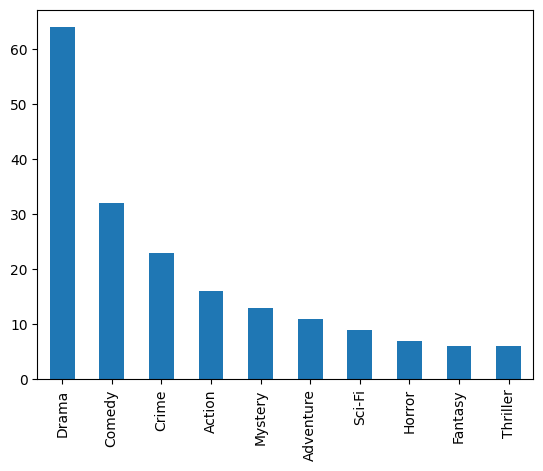

In [30]:
agent("Draw a histogram graph of the top 10 genres")

In [40]:
agent("Let me know about Movie according to least and most votes")



> Entering new AgentExecutor chain...
Thought: I need to sort the dataframe by the "votes" column and then select the first and last row.
Action: python_repl_ast
Action Input: df.sort_values(by="votes").iloc[[0,-1]]    lister-item-index lister-item-header certificate runtime  \
0                 1.0    Stranger Things          15  60 min   
78               79.0         Dead to Me          15  30 min   

                     genre  rating      votes  
0   Drama, Fantasy, Horror     8.7  1,327,188  
78    Comedy, Crime, Drama     7.9     99,440   I now know the final answer
Final Answer: The least voted movie is "Dead to Me" with 99,440 votes and the most voted movie is "Stranger Things" with 1,327,188 votes.

> Finished chain.


{'input': 'Let me know about Movie according to least and most votes',
 'output': 'The least voted movie is "Dead to Me" with 99,440 votes and the most voted movie is "Stranger Things" with 1,327,188 votes.'}